In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from os import path

In [2]:
base_dir = './data'
price_dir = path.join(base_dir, 'daily_price_old')

In [3]:
df = pd.read_csv(path.join(price_dir, "AAPL_AV_daily_price.csv"))
df2 = pd.read_csv(path.join(price_dir, "MSFT_US_daily_price.csv"))

In [4]:
df.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
0,2017-12-29,False,daily,143.00,143.00,142.70,142.70,290.0,143.00,143.00,142.70,142.70,290.0
1,2017-12-28,False,daily,143.00,143.30,142.80,143.10,1258.0,143.00,143.30,142.80,143.10,1258.0
2,2017-12-27,False,daily,142.90,142.90,142.90,142.90,77.0,142.90,142.90,142.90,142.90,77.0
3,2017-12-22,False,daily,147.70,147.70,147.40,147.40,396.0,147.70,147.70,147.40,147.40,396.0
4,2017-12-20,False,daily,147.85,148.05,146.45,146.45,701.0,147.85,148.05,146.45,146.45,701.0


In [5]:
price_diff = df[["date", "open"]].sort_values(by='date')
price_diff = price_diff.reset_index()
price_diff.drop(columns=["index"], inplace=True)

In [6]:
price_diff.loc[:,'prev_open'] = price_diff.loc[:,"open"].shift()
price_diff.loc[:,'diff'] = price_diff['open'] - price_diff['prev_open']

In [7]:
price_diff.head()

,date,open,prev_open,diff
0,2017-05-23,137.03,NaN,NaN
1,2017-05-24,137.80,137.03,0.77
2,2017-05-29,137.68,137.80,-0.12
3,2017-05-30,138.40,137.68,0.72
4,2017-05-31,137.45,138.40,-0.95


In [24]:
def animate_moving_distribtuion(i):
    plt.clf()
    data = price_diff.loc[i-49:i, 'diff']
    return sns.distplot(data)

def price_diff_frames():
    for i in range(50,price_diff.shape[0]+1):
        yield i

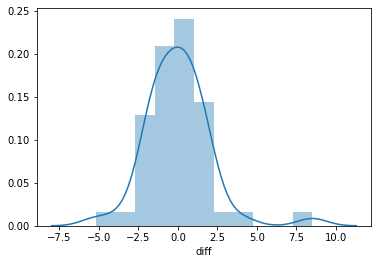

In [26]:
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate_moving_distribtuion, frames=price_diff_frames, interval=500)
ani.save("test.html",writer='html')
#plt.show()

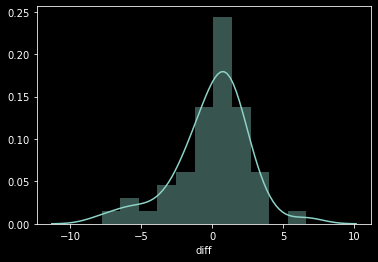

In [44]:
sns.distplot(price_diff.loc[151:200,'diff'])

In [48]:
price_diff2 = df2.loc[df2["date"] >= '2017-12-29', ["date", "open"]].sort_values(by='date')

In [49]:
price_diff2.loc[:,'prev_open'] = price_diff2.loc[:,"open"].shift()
price_diff2.loc[:,'diff'] = price_diff2['open'] - price_diff2['prev_open']

In [14]:
sns.lineplot(x='date',y='diff', data=price_diff2)

NameError: name 'price_diff2' is not defined